# Appendix C.2 Shewhart's additional resistance measurements

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

pd.set_option('display.max_rows', None)

%matplotlib inline

## Step 1. Gather the data

In [2]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
shewhart_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/shewharts-resistance-measurements.csv'
# Vienna General dataset url
shewhart_df = get_data(shewhart_url)

# Show first 10 lines of vienna_df
shewhart_df.columns

Index(['Stage', 'Units', 'Value', 'Resistance'], dtype='object')

### Drop unnecessary columns from vienna_df

In [3]:
shewhart_df = shewhart_df[['Stage', 
                           #'Units', 
                           'Value', 
                           'Resistance']]

# Make 'Value' column dtype string
shewhart_df['Value'] = shewhart_df['Value'].astype('string')

shewhart_df

,Stage,Value,Resistance
0,Initial,1,5045
1,Initial,2,4350
2,Initial,3,4350
3,Initial,4,3975
4,Initial,5,4290
5,Initial,6,4430
6,Initial,7,4485
7,Initial,8,4285
8,Initial,9,3980
9,Initial,10,3925


### Split vienna_df into before_df and after_df

In [4]:
initial_df = shewhart_df[shewhart_df['Stage'] == 'Initial'].copy()
additional_df = shewhart_df[shewhart_df['Stage'] == 'Additional'].reset_index(drop=True)

## Step 2. Calculate the moving ranges

In [5]:
# Calculate the moving ranges for before_df
additional_df['Moving Ranges'] = abs(additional_df['Resistance'].diff())
additional_df

,Stage,Value,Resistance,Moving Ranges
0,Additional,1,4400,NaN
1,Additional,2,4565,165.0
2,Additional,3,4495,70.0
3,Additional,4,4325,170.0
4,Additional,5,4385,60.0
5,Additional,6,4545,160.0
6,Additional,7,4235,310.0
7,Additional,8,4370,135.0
8,Additional,9,4340,30.0
9,Additional,10,4500,160.0


## Step 3. Calculate the average moving range

In [6]:
# Calculate the average moving range for before_df['Moving Ranges']
additional_ave_mR = round(additional_df['Moving Ranges'].mean(),1)
additional_ave_mR

189.8

## Step 4. Calculate the mean

In [7]:
# Calculate the mean before_df['Rate']
additional_mean = round(additional_df['Resistance'].mean(),1)
additional_mean

4417.8

## Step 5. Calculate the process limits

In [8]:
# Upper Process Limit (UPL)
additional_UPL = round(additional_mean + (2.660*additional_ave_mR),1)
# Lower Process Limit (LPL)
additional_LPL = round(additional_mean - (2.660*additional_ave_mR),1)
# Upper Process Limit (UPL)
additional_URL = round(3.268*additional_ave_mR,1)
# Show results
print('UPL', additional_UPL)
print('LPL', additional_LPL)
print('URL', additional_URL)

UPL 4922.7
LPL 3912.9
URL 620.3


## Step 6. Put it all together

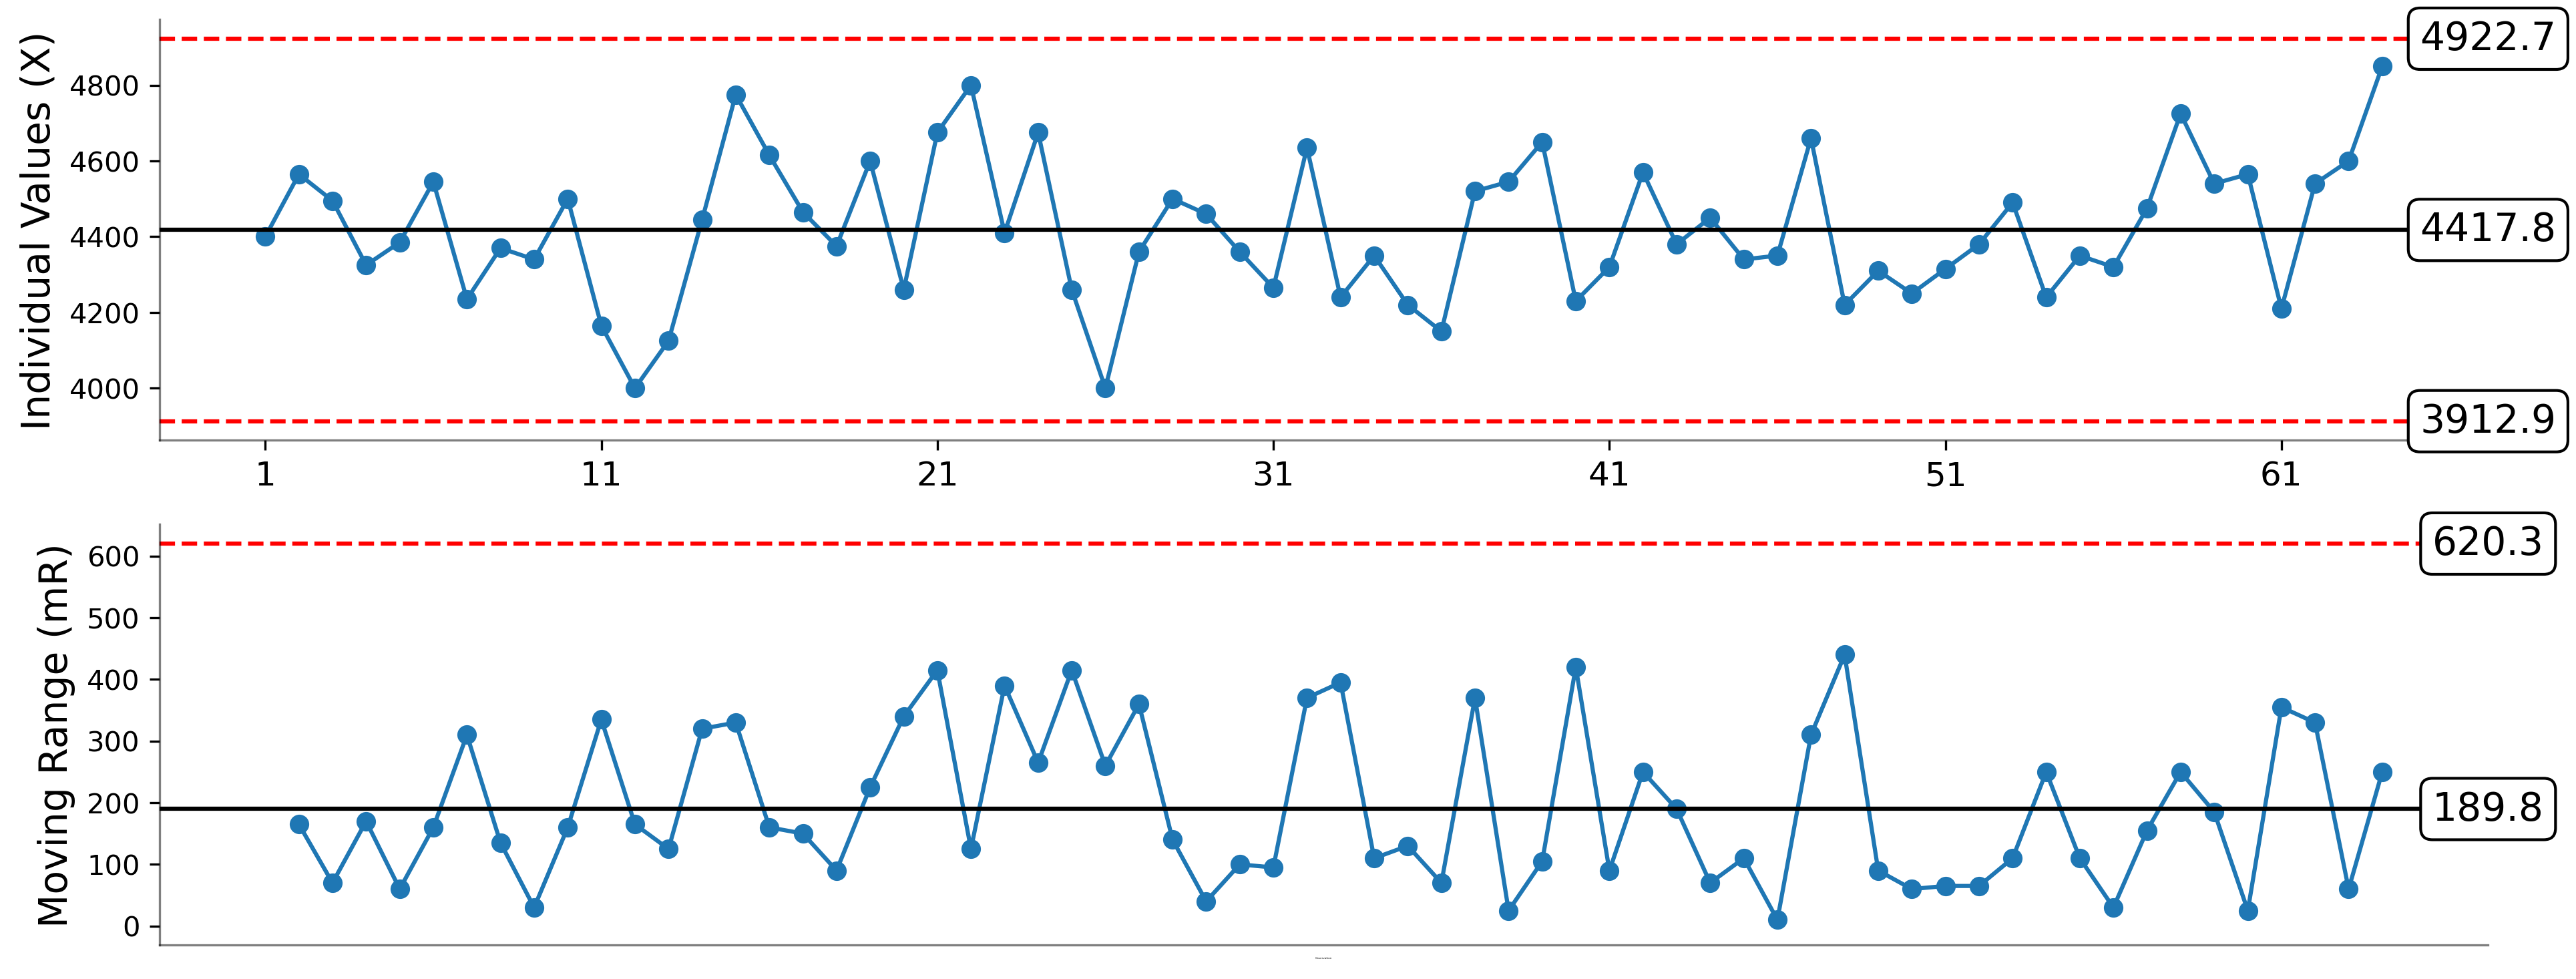

In [10]:
initial_results = xmr.xmr_chart(additional_df,
                                'Resistance',
                                'Value',
                                tickinterval=10, 
                                round_value=1, 
                                label_fontsize=14,
                                xtick_fontsize=12)